# Parkinson Disease Detection Using ML

### DataSet Description

Parkinson Disease
Parkinson Disease is a brain neurological disorder. It leads to shaking of the body, hands and provides stiffness to the body. No proper cure or treatment is available yet at the advanced stage. Treatment is possible only when done at the early or onset of the disease. These will not only reduce the cost of the disease but will also possibly save a life. Most methods available can detect Parkinson in an advanced stage; which means loss of approx.. 60% dopamine in basal ganglia and is responsible for controlling the movement of the body with a small amount of dopamine. More than 145,000 people have been found alone suffering in the U.K and in India, almost one million population suffers from this disease and it’s spreading fast in the entire world.

A person diagnosed with Parkinson’s disease can have other symptoms that include-

1. Depression

2. Anxiety

3. Sleeping, and memory-related issues

### Atributes Info

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



### Importing The Required Dependancies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("parkinsons.data", header=None, delimiter=",",names=['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE'])

data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [3]:
data.drop(index=0,inplace=True)

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
data['name'].value_counts()

phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: name, Length: 195, dtype: int64

In [45]:
data.shape

# 195 rows and 24 columns

(195, 24)

### Checking for Datatypes

In [12]:
data.dtypes

name                object
MDVP:Fo(Hz)         object
MDVP:Fhi(Hz)        object
MDVP:Flo(Hz)        object
MDVP:Jitter(%)      object
MDVP:Jitter(Abs)    object
MDVP:RAP            object
MDVP:PPQ            object
Jitter:DDP          object
MDVP:Shimmer        object
MDVP:Shimmer(dB)    object
Shimmer:APQ3        object
Shimmer:APQ5        object
MDVP:APQ            object
Shimmer:DDA         object
NHR                 object
HNR                 object
status              object
RPDE                object
DFA                 object
spread1             object
spread2             object
D2                  object
PPE                 object
dtype: object

### Convert the Object Datatypes to Float

In [13]:
data[1:].columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [14]:
cols=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']


In [15]:
data=data[cols].astype(float)
  
     

In [16]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [56]:
data.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status              float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Check for Null vals

In [29]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**There are No null values present in the Data Set**

### Check for Statistical summary

In [38]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### check for Distribution

Skewness of  MDVP:Fo(Hz) = 0.5917374636540784
----------------------------------------


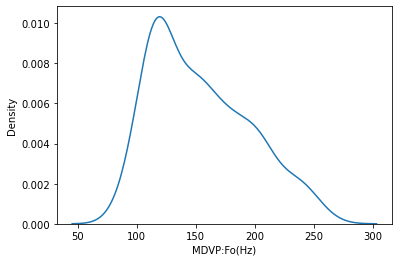

Skewness of  MDVP:Fhi(Hz) = 2.542145997588398
----------------------------------------


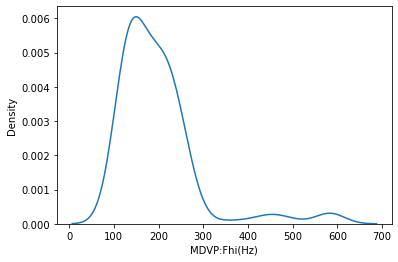

Skewness of  MDVP:Flo(Hz) = 1.217350448627808
----------------------------------------


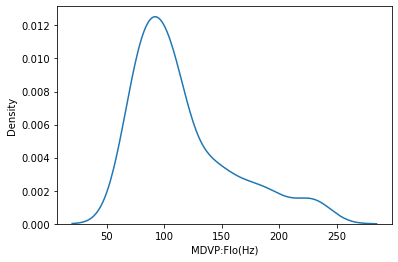

Skewness of  MDVP:Jitter(%) = 3.0849462014441826
----------------------------------------


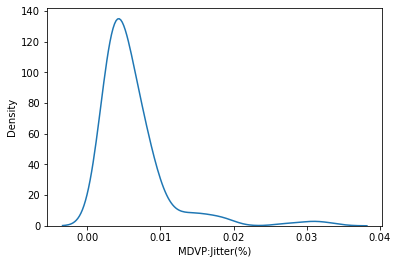

Skewness of  MDVP:Jitter(Abs) = 2.6490714165257274
----------------------------------------


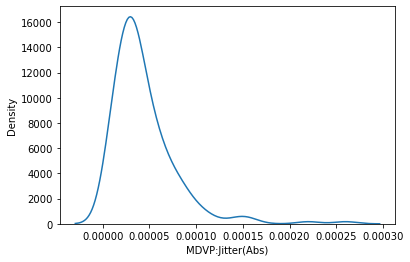

Skewness of  MDVP:RAP = 3.3607084504805544
----------------------------------------


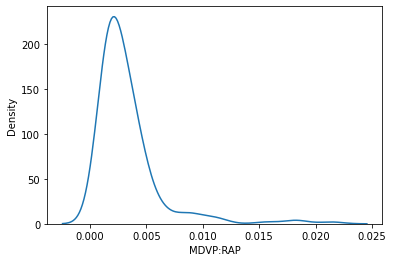

Skewness of  MDVP:PPQ = 3.0738924578885167
----------------------------------------


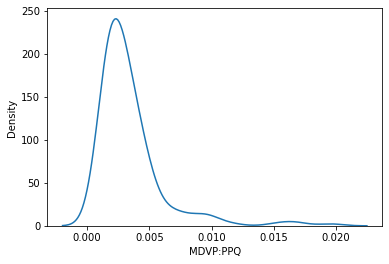

Skewness of  Jitter:DDP = 3.36205844788572
----------------------------------------


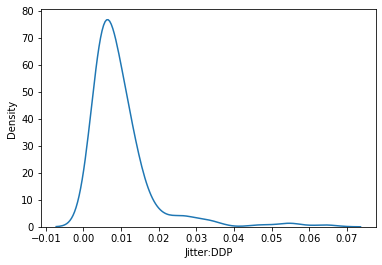

Skewness of  MDVP:Shimmer = 1.6664804101559665
----------------------------------------


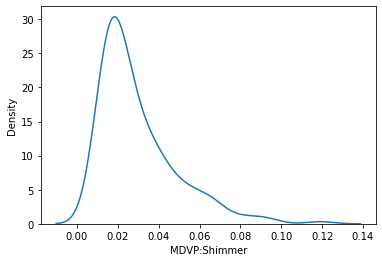

Skewness of  MDVP:Shimmer(dB) = 1.999388639086127
----------------------------------------


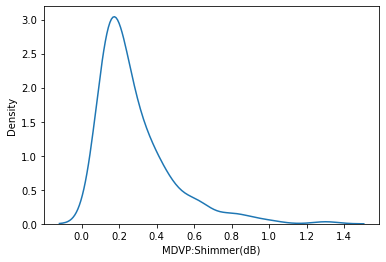

Skewness of  Shimmer:APQ3 = 1.5805763798815669
----------------------------------------


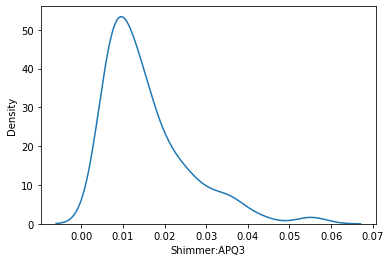

Skewness of  Shimmer:APQ5 = 1.7986970665376225
----------------------------------------


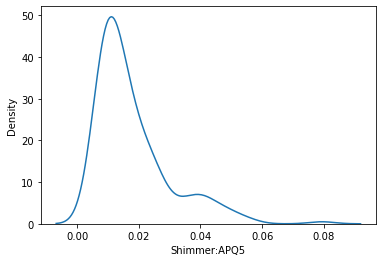

Skewness of  MDVP:APQ = 2.6180465022154227
----------------------------------------


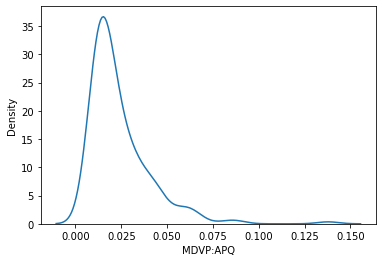

Skewness of  Shimmer:DDA = 1.5806179936782254
----------------------------------------


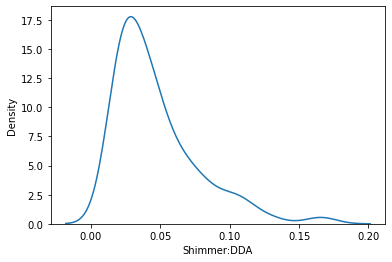

Skewness of  NHR = 4.2207091291390615
----------------------------------------


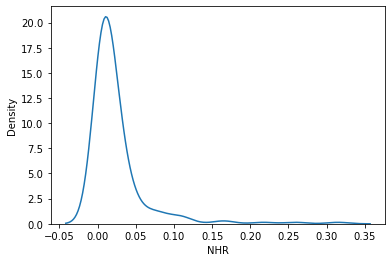

Skewness of  HNR = -0.5143174975652068
----------------------------------------


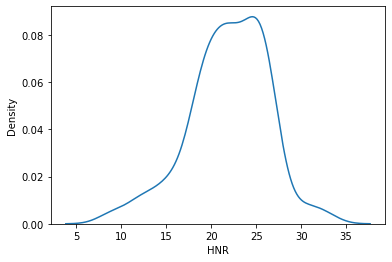

Skewness of  status = -1.1877273855919208
----------------------------------------


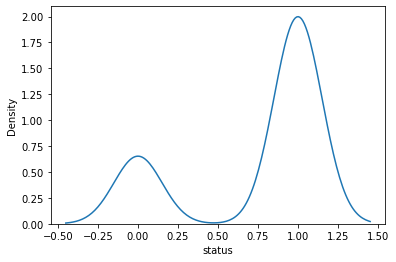

Skewness of  RPDE = -0.14340241379821705
----------------------------------------


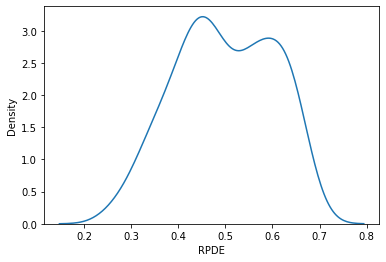

Skewness of  DFA = -0.03321366071383457
----------------------------------------


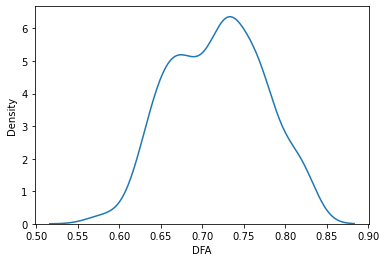

Skewness of  spread1 = 0.4321389320131794
----------------------------------------


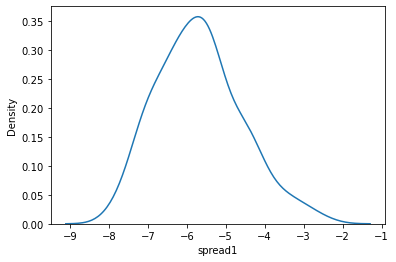

Skewness of  spread2 = 0.1444304854927841
----------------------------------------


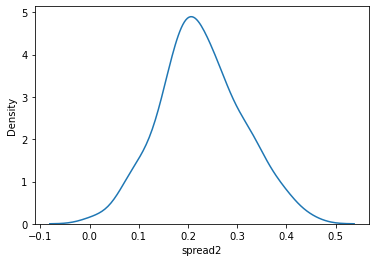

Skewness of  D2 = 0.4303838913329285
----------------------------------------


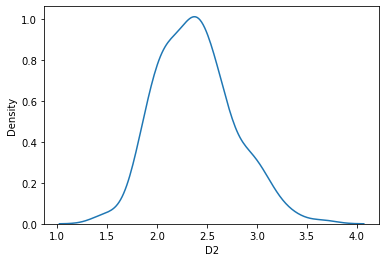

Skewness of  PPE = 0.7974910716463577
----------------------------------------


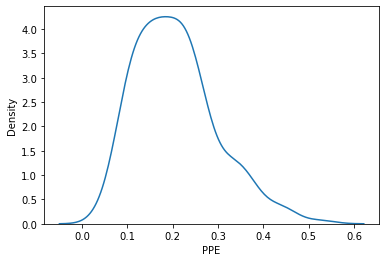

In [63]:
for i in data.columns:
    print('Skewness of ',i,'=',data[i].skew())
    print('--'*20)
    sns.kdeplot(data[i])
    plt.show()

### Check for Correlation

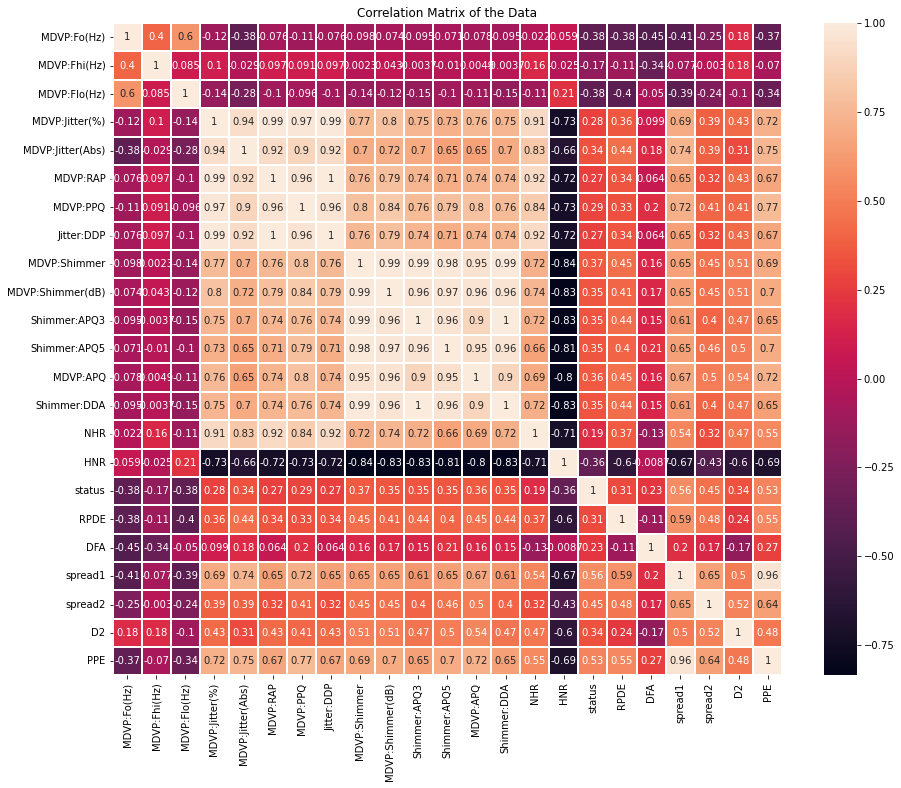

In [67]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.1)
plt.title('Correlation Matrix of the Data')
plt.show()

### Building a Non-Linear model

### Random Forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
df=data.copy()

In [72]:
df['status'].unique()

array([1., 0.])

In [19]:
X=df.drop('status',axis=1)
y=df['status']

In [20]:
x=StandardScaler().fit_transform(X)

In [21]:
X=pd.DataFrame(x,columns=X.columns)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(136, 22) (59, 22) (136,) (59,)


In [23]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [24]:
print('accuracy_score',accuracy_score(y_test,y_pred))

accuracy_score 0.847457627118644


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75        19
         1.0       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



In [27]:
confusion_matrix(y_test,y_pred)

array([[11,  8],
       [ 1, 39]], dtype=int64)

True Positives (TP): 11. This means that the Random Forest model correctly identified 11 patients with Parkinson's disease.

False Positives (FP): 8. This means that the Random Forest model incorrectly identified 8 patients as having Parkinson's disease when they actually did not.

False Negatives (FN): 1. This means that the Random Forest model incorrectly identified 1 patient as not having Parkinson's disease when they actually did.

True Negatives (TN): 39. This means that the Random Forest model correctly identified 39 patients as not having Parkinson's disease.

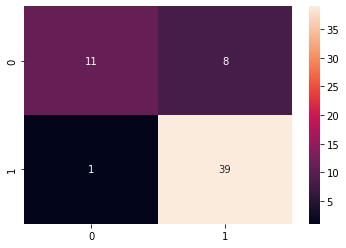

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### XGB classifier

In [28]:
X=data.drop('status',axis=1)
y=data['status']

In [29]:
data['status'].value_counts()

1.0    147
0.0     48
Name: status, dtype: int64

In [31]:
scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(X)



x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)


model=XGBClassifier(eval_metric='mlogloss')

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [33]:
y_pred=model.predict(x_test)
print('accuracy_score',accuracy_score(y_test, y_pred)*100)

accuracy_score 94.87179487179486


### XGB Feature Importance

In [55]:
y=pd.DataFrame(model.feature_importances_,X.columns,columns=['Feature_Impotance']).sort_values('Feature_Impotance',ascending=False)
y.head()

,Feature_Impotance
spread1,0.371696
MDVP:Shimmer(dB),0.116652
PPE,0.108530
MDVP:Shimmer,0.048219
NHR,0.045911


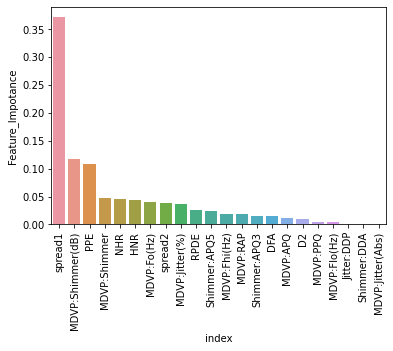

In [56]:
y=y.reset_index()
sns.barplot(y['index'],y['Feature_Impotance'])
plt.xticks(rotation=90)
plt.show()

### Random Forest Feature Importance

In [50]:
y=pd.DataFrame(rfc.feature_importances_,X.columns,columns=['Feature_Impotance']).sort_values('Feature_Impotance',ascending=False)
y.head()

,Feature_Impotance
PPE,0.127353
MDVP:Fo(Hz),0.120235
spread1,0.109110
Jitter:DDP,0.051754
MDVP:RAP,0.048197


In [52]:
y=y.reset_index()

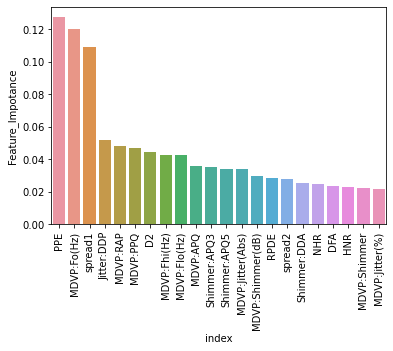

In [54]:
sns.barplot(y['index'],y['Feature_Impotance'])
plt.xticks(rotation=90)
plt.show()

To conclude These Below three Features found out to be a critical aspect to consider By evaluating Both models Features Importances
* spread1
* MDVP:Shimmer(dB)
* PPE

In this Python machine learning project, we learned to detect the presence of Parkinson’s Disease in individuals using various factors. We used an XGBClassifier for this and made use of the sklearn library to prepare the dataset. This gives us an accuracy of 94.87%.

# Conclusion


Parkinson’s disease affects the CNS of the brain and has yet no treatment unless it’s detected early. Late detection leads to no treatment and loss of life. Thus its early detection is significant. For early detection of the disease, we utilized machine learning algorithms such as XGBoost and Random Forest. We checked our Parkinson disease data and find out XGBoost is the best Algorithm to predict the onset of the disease which will enable early treatment and save a life.